In [101]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [127]:
import seaborn as sns

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [104]:
from tensorflow.keras.datasets import mnist

In [105]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label : 3


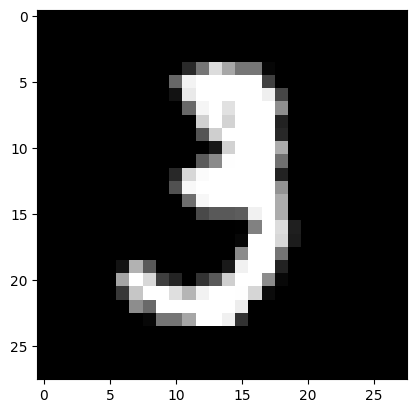

In [107]:
import matplotlib.pyplot as plt
print('Label : {}'.format(y_train[10]))
plt.imshow(X_train[10], cmap='grey')

This is the image of number 3

Label : 4


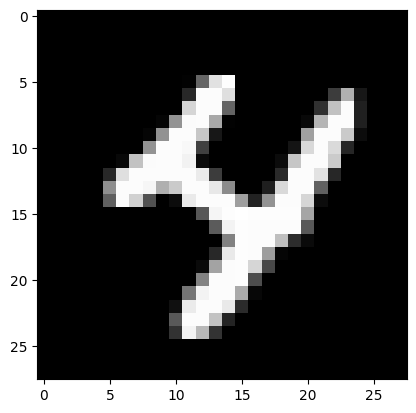

In [108]:
print('Label : {}'.format(y_train[697]))
plt.imshow(X_train[697], cmap='gray')

In [109]:
# Normalize the data
X_train = X_train /255
X_test = X_test / 255

In [110]:
# reshpaing of data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [111]:
# One hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

**Creating CNN**

In [112]:
model = Sequential()

# 1st convolution layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

# 2nd convolution layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

# #Dropout Layer
# model.add(Dropout(0.5))

#Flatten Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))

#Output
model.add(Dense(10, activation='softmax'))


In [113]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [114]:
hist = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9235 - loss: 0.2429 - val_accuracy: 0.9867 - val_loss: 0.0417
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9880 - loss: 0.0386 - val_accuracy: 0.9901 - val_loss: 0.0328
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9865 - val_loss: 0.0418
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9915 - val_loss: 0.0256
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9886 - val_loss: 0.0361
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9907 - val_loss: 0.0369
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9900 - val_loss: 0.0384
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9985 -

In [137]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9891 - loss: 0.0638


[0.046438105404376984, 0.9916999936103821]

In [138]:
# Generate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [139]:
print(y_pred_classes)

[7 2 1 ... 4 5 6]


In [140]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [123]:
# convert y_test to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

In [141]:
print(y_test_classes)

[7 2 1 ... 4 5 6]


In [142]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

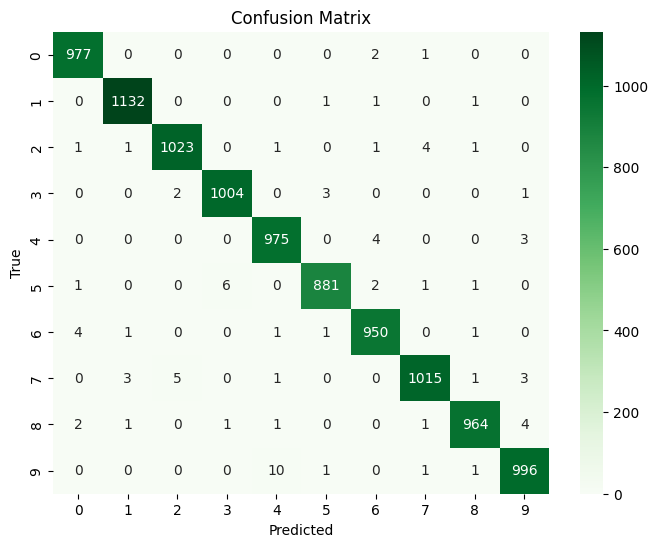

In [143]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Correct predictions are highlighted in green color